#### pandas 내장 그래프 도구
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프 그림
- 막대그래프 : df.plot(kind='bar') #수직, df.plot(kind='barh', stacked=True, alpha = 0.8) #수평
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y='',kind='scatter') 상관관계 확인 시
- 박스 플룻 : df.plot(kind ='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.jointplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [8]:
# df.drop(['전일종가'],axis=1,inplace = True) # 이미 드랍 실행을 해가지고 안됬음
df.rename(columns = {'연월일':'Date','당일종가':'Close','시가':'Start','고가':'High','저가':'Low','거래량':'Volumn'}, inplace= True)
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [16]:
# Date를 datetime으로 바꾸고 인덱스로 셋팅
import datetime 
from datetime import datetime
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop('Volumn',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

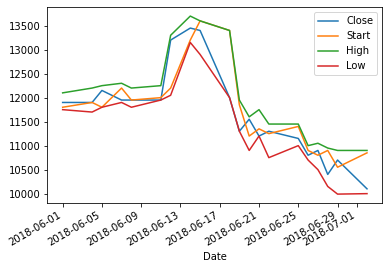

In [17]:
# 선그래프
df1.plot()

<AxesSubplot:xlabel='Date'>

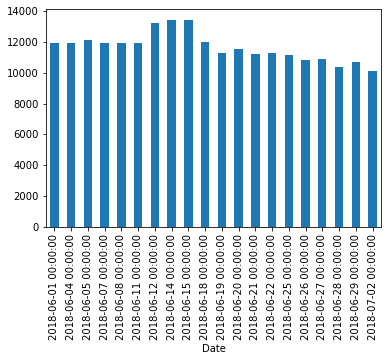

In [20]:
df2 = df1.sort_index()
df2.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

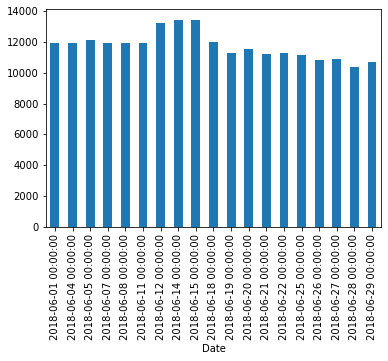

In [32]:
# Q. 6월 데이터만을  추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요 , datetime은 인덱싱이 됨
df2.loc['2018-06'].Close.plot(kind='bar')
# df2.Close.plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

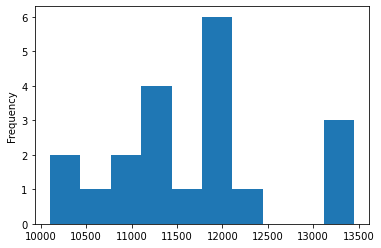

In [33]:
df2.Close.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

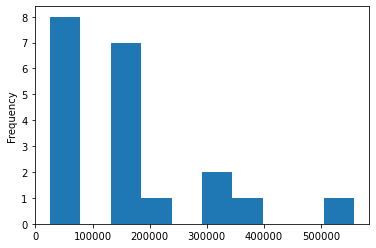

In [35]:
df.rename(columns={'Volumn':'Volume'},inplace=True)
df.Volume.plot(kind='hist')

In [36]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

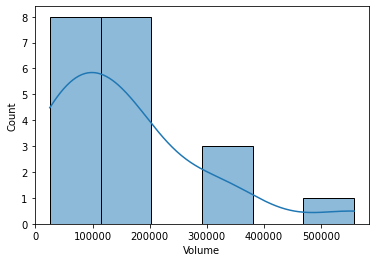

In [39]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

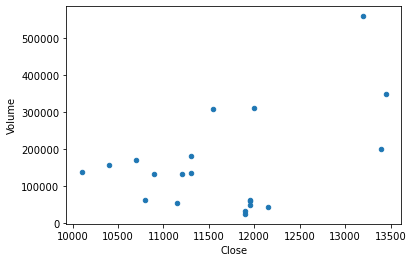

In [41]:
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

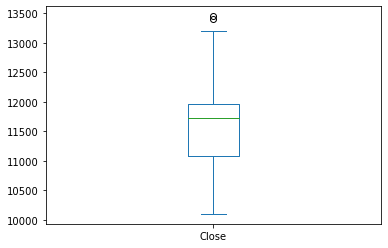

In [42]:
# Box.plot
df.Close.plot(kind='box') 
# 녹색선은 중앙
# 최대,최소는 아니고 upperwisper? 
# 나머지 25~78를 박스로 나타냄

### Box plot 해석
- IQR(inter Quartile Range) : 제 3사분위수 - 제 1사분위수
- lower whisker : Q1(1사분위수) - 1.5 * IQR 값 이내인 값중에서 최소값
- upper whisker : Q3 + 1.5 * IQR 값 이내인 값중에서 최대값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [51]:
# Close 칼럼의 이상치를 구하세요
IQR = 11962.5 - 11087.5
lw = 11087.5 - 1.5 * 875.0
uw = 11962.5 + 1.5 * 875.0
print(IQR,lw,uw)
a = df['Close']>uw
b = df['Close']<lw
print(df.Close.loc[a],'\n')
print(df.Close.loc[b])

875.0 9775.0 13275.0
11    13400
12    13450
Name: Close, dtype: int64 

Series([], Name: Close, dtype: int64)


In [54]:
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
print(Q3 + 1.5 * IQR) # 구한 upper whisker값 안에 가장 큰 값을 기준으로 삼는다
# 구한 값은 13275지만 그 안에서 가장 큰값은 13200을 기준으로 한다.
print()
print(df.Close.sort_values(ascending=False)[:5])
df.Close.loc[df.Close > Q3 + 1.5 * IQR]

13275.0

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64


11    13400
12    13450
Name: Close, dtype: int64

#### [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box plot 및 이상치를 구하세요

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64 

13437.5

11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64

11    13600
Name: Start, dtype: int64


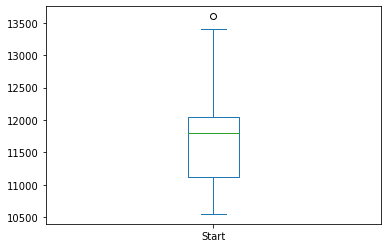

In [63]:
df.Start.plot(kind='box')
print(df.Start.describe(),'\n')
IQR = 12050 - 11125
uw = 12050 + 1.5 * IQR
print(uw)
print()
a = df['Start']>uw
print(df.Start.sort_values(ascending=False)[:5])
print()
print(df.Start.loc[a])


#### [과제] df_op 데이터 프레임으로 다음을 수행하세요
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

<AxesSubplot:>

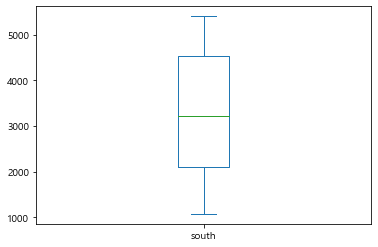

In [189]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
# df_ep.plot()
# df_ep.south.plot(kind='bar')
# df_ep.south.plot(kind='hist')
df_ep.south.plot(kind='box')



#### [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요

In [1]:
import pandas as pd
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [216]:
mpg_to_kpl = 1.60934 / 3.78541
df_auto['kpl'] = round(df_auto['mpg'] * mpg_to_kpl,2)
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,7.23


In [206]:
df_auto['horsepower'].replace('?',np.nan,inplace=True)
df_auto['horsepower'] = df_auto['horsepower'].astype(float)
df_auto.origin.replace({1:'USA',2:'EU',3:'JAPAN'},inplace=True)

In [207]:
df_auto.head() 
# 연료효율 : mpg 높을수록 좋다
# cylinders : 배기통 3~8 까지 존재
# displacement : 배기량

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,7.23


In [238]:
# df_auto.cylinders.plot(kind='scatter')
cy = df_auto['cylinders']
ho = df_auto['horsepower']
dis = df_auto['displacement']
mpg = df_auto['mpg']

# 각 개체들은 시리즈여서 시리즈 2개를 묶어서 데이터프레임화 하려고 

In [245]:
a = df_auto.cylinders
b = df_auto.origin
c = df_auto.mpg
d = df_auto.displacement
e = df_auto.horsepower
f = df_auto.weight
g = df_auto.acceleration
h = df_auto.model

pandas.core.series.Series

<AxesSubplot:>

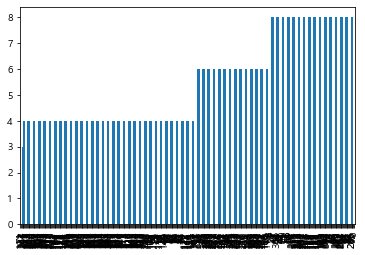

In [247]:
df_auto2 = a.sort_values()
df_auto2.plot(kind='bar')

(array([1., 3., 2., 2., 2., 2., 2., 3., 6., 2., 3., 2., 4., 3., 1., 4., 3.,
        1., 2., 2.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ,
        31.7, 34.4, 37.1, 39.8, 42.5, 45.2, 47.9, 50.6, 53.3, 56. ]),
 <BarContainer object of 20 artists>)

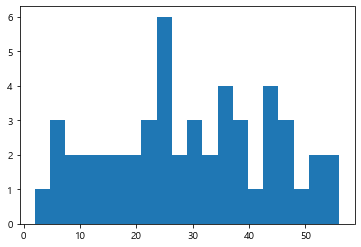

In [8]:
import matplotlib.pyplot as plt
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size=50)
plt.hist(data,bins=20)

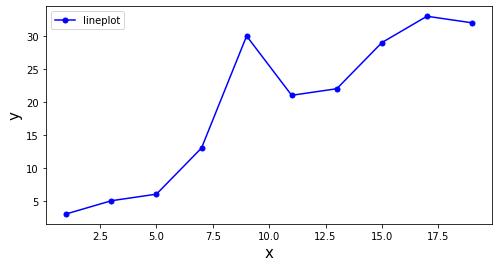

In [70]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(8,4)) # 전체 크기를 늘려주는 함수
plt.plot(x,y,color='blue',marker='o',markersize=5) 
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

In [7]:
import numpy as np
import pandas as pd
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(10,6))
plt.plot(x,y1) 
plt.plot(x,y2,color='magenta',marker='o',markersize=5) 
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

NameError: name 'plt' is not defined

Text(0, 0.5, 'x')

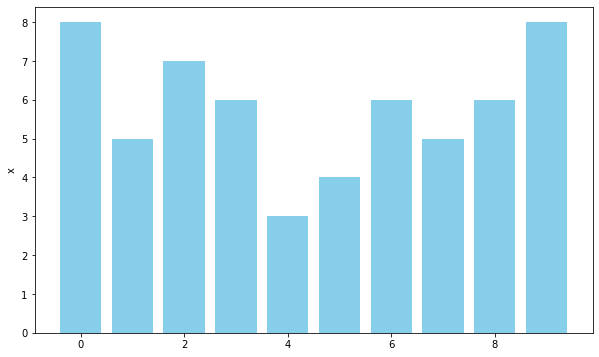

In [77]:
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.ylabel('x')

In [81]:
df = pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


In [6]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위가 있을경우 처리
import warnings
warnings.filterwarnings('ignore')
# x = df['movieNm'].tolist()
# y = df['salesAmt'].tolist()
plt.figure(figsize=(20,10))
plt.bar(x,y,width=0.8,color='skyblue')
plt.title('영화별 총매출액',size =30)
plt.xlabel('Movie Name',size = 20)
plt.ylabel('Sales Amount', size = 20)
plt.xticks(rotation=45)

NameError: name 'plt' is not defined

Text(0, 0.5, 'weight')

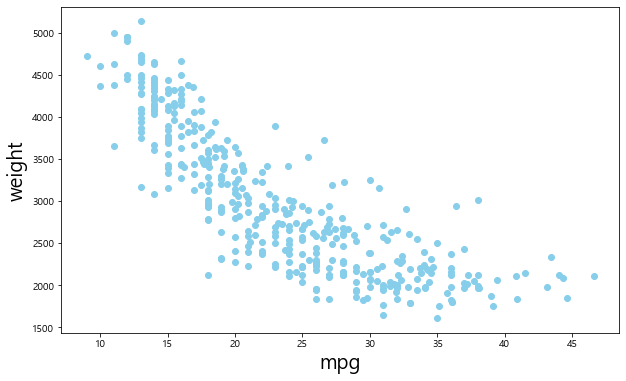

In [115]:
# scatter plot
import pandas as pd
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size=20)
plt.ylabel('weight',size=20)

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

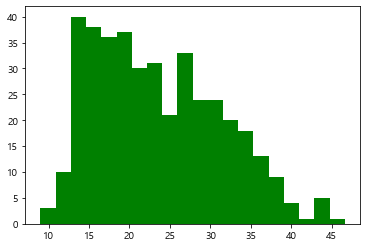

In [140]:
# hisogram
plt.hist(x,bins=20,color='g')

## 하나에 여러개 나타내기

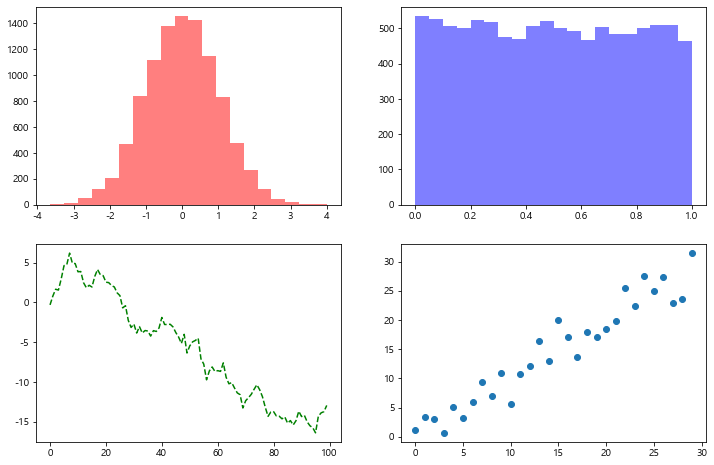

In [151]:
fig = plt.figure(figsize=(12,8))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1) # 앞 2개는 크기 마지막거는 위치
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(10000),bins=20, color='r',alpha = 0.5) # alpha는 투명도임
ax2.hist(np.random.rand(10000),bins=20, color='b',alpha = 0.5)
ax3.plot(np.random.randn(100).cumsum(), 'g--') 
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

### [과제] 히스토그램,선,막대,산점도 그래프 4개를 서브플롯으로 출력

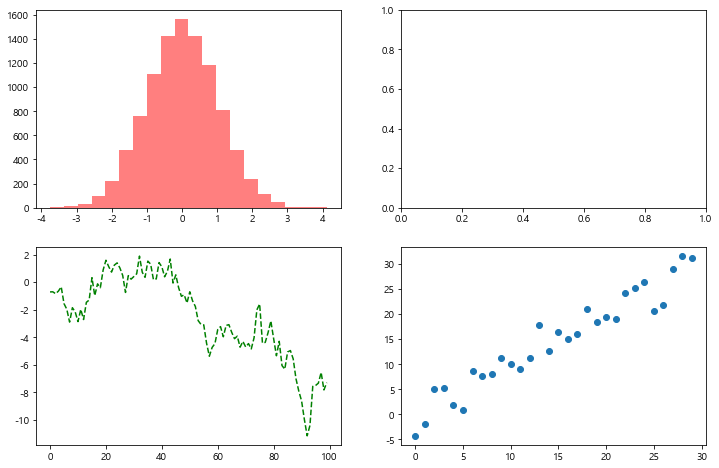

In [194]:
fig = plt.figure(figsize=(12,8))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1) # 앞 2개는 크기 마지막거는 위치
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(10000),bins=20, color='r',alpha = 0.5) # alpha는 투명도임
# ax2.bar(np.random.rand(10000),width=0.8, color='b',alpha = 0.5)
ax3.plot(np.random.randn(100).cumsum(), 'g--') 
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

In [5]:
from numpy.random import randn
plt.figure(figsize=(10,6))
# plt.plot(np.random.randn(30)) 위에 저걸 쓰면 안쓰고
plt.plot(randn(30).cumsum(),linestyle='dashed',color='b',marker='o')


NameError: name 'plt' is not defined

In [156]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [177]:
# t3에서 age열을 범주화 한 후 age_cat열을 추가하세요
def get_category(age):
    cat = ''
    if age <= 12: cat = 'Child'
    elif age <= 19: cat = 'Teen'
    elif age <= 29: cat = '20s'
    elif age <= 39: cat = '30s'
    elif age <= 49: cat = '40s'
    elif age <= 59: cat = '50s'
    else: cat = 'Elderly'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:get_category(x))
t3[['age','age_cat']].head()


,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


         pclass  survived  sibsp  parch       fare    body  Ratio
age_cat                                                          
20s         838       127    112     77  9198.3038  5125.0    344
30s         488        98     80     73  9578.5332  5020.0    232
40s         250        52     50     68  5723.5168  3429.0    135
50s         101        32     29     21  4384.9541  1889.0     70
Child       248        54    161    129  2828.9540     5.0     94


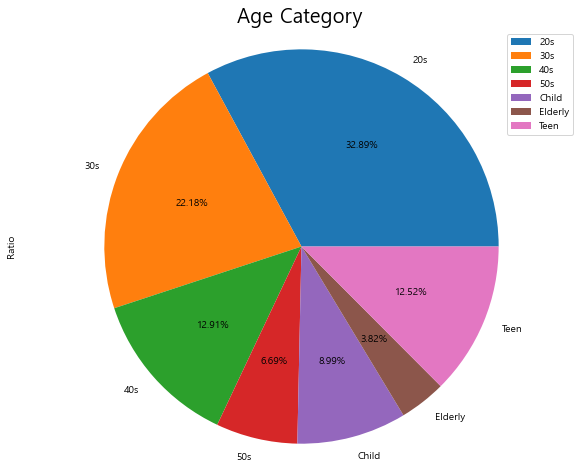

In [178]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat.head())

df_age_cat.Ratio.plot(kind='pie',
                     figsize = (10,8),
                     autopct='%.2f%%',
                     startangle= 0) # 처음 시작 포인트 지정
plt.title('Age Category',size = 20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

AttributeError: 'set' object has no attribute 'setdefault'

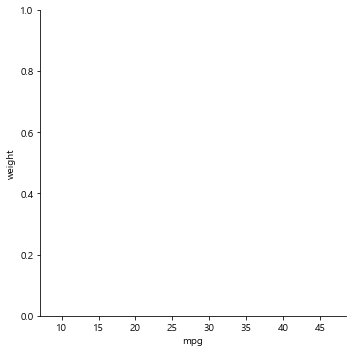

In [12]:
import seaborn as sns
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color','green'})

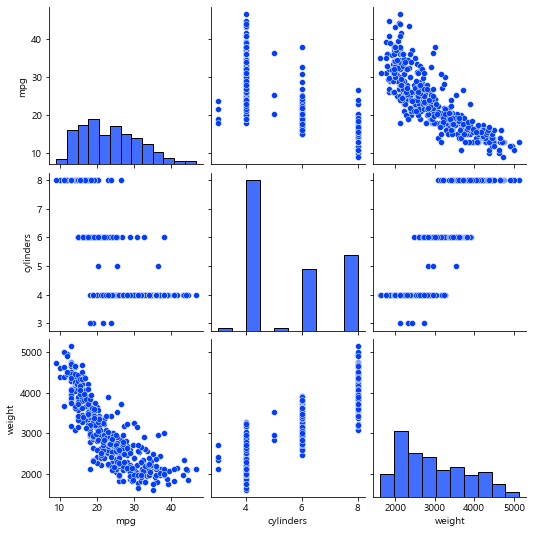

In [16]:
sns.set_palette('bright')
df2 = df_auto[['mpg','cylinders','weight']]
sns.pairplot(df2)

Text(0.5, 1.0, 'Heatmap of the Dataset')

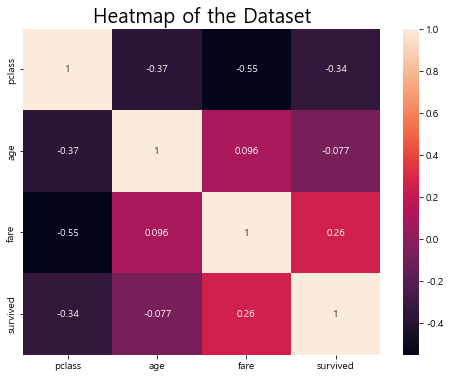

In [24]:
tdf = sns.load_dataset('titanic')
plt.figure(figsize=(8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [25]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

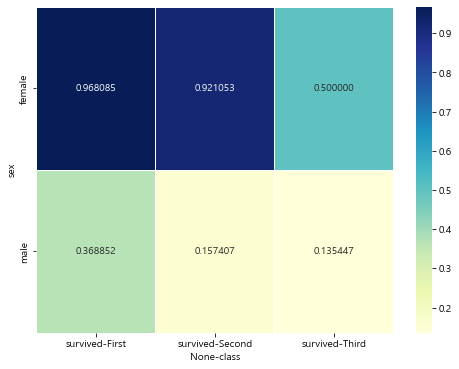

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot = True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar = True)